<a href="https://colab.research.google.com/github/sonamthinley888/Capstone-Project/blob/main/myCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Import Required Packages for EDA 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import plotly.graph_objects as go 
import plotly.express as px 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [12]:
#Read the dataset/s
df = pd.read_csv('/content/drive/MyDrive/MyCapstoneProject/sepsis_file.csv')


In [13]:
# Removing Patient ID and Insurance
df = df[["PRG", "PL", "PR",  "SK",  "TS", "M11", "BD2", "Age","Sepsis"]]


In [14]:
# Converting Target Variable to integer
from sklearn.preprocessing import OrdinalEncoder
for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))

In [15]:
#1. Checking description(first 5 and last 5 rows)
df.head() 


PRG   PL  PR  SK   TS   M11    BD2  Age  Sepsis
0    6  148  72  35    0  33.6  0.627   50     1.0
1    1   85  66  29    0  26.6  0.351   31     0.0
2    8  183  64   0    0  23.3  0.672   32     1.0
3    1   89  66  23   94  28.1  0.167   21     0.0
4    0  137  40  35  168  43.1  2.288   33     1.0

In [16]:
df.tail()

PRG   PL  PR  SK   TS   M11    BD2  Age  Sepsis
763   10  101  76  48  180  32.9  0.171   63     1.0
764    2  122  70  27    0  36.8  0.340   27     1.0
765    5  121  72  23  112  26.2  0.245   30     1.0
766    1  126  60   0    0  30.1  0.349   47     1.0
767    1   93  70  31    0  30.4  0.315   23     1.0

In [17]:
#rows and columns-data shape(attributes & samples)

df.shape


(768, 9)

In [18]:
# name of the attributes
df.columns


Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Sepsis'], dtype='object')

In [19]:
#unique values for each attribute
df.nunique()


PRG        17
PL        136
PR         47
SK         51
TS        186
M11       248
BD2       517
Age        52
Sepsis      2
dtype: int64

In [20]:
#Complete info about data frame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRG     768 non-null    int64  
 1   PL      768 non-null    int64  
 2   PR      768 non-null    int64  
 3   SK      768 non-null    int64  
 4   TS      768 non-null    int64  
 5   M11     768 non-null    float64
 6   BD2     768 non-null    float64
 7   Age     768 non-null    int64  
 8   Sepsis  768 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


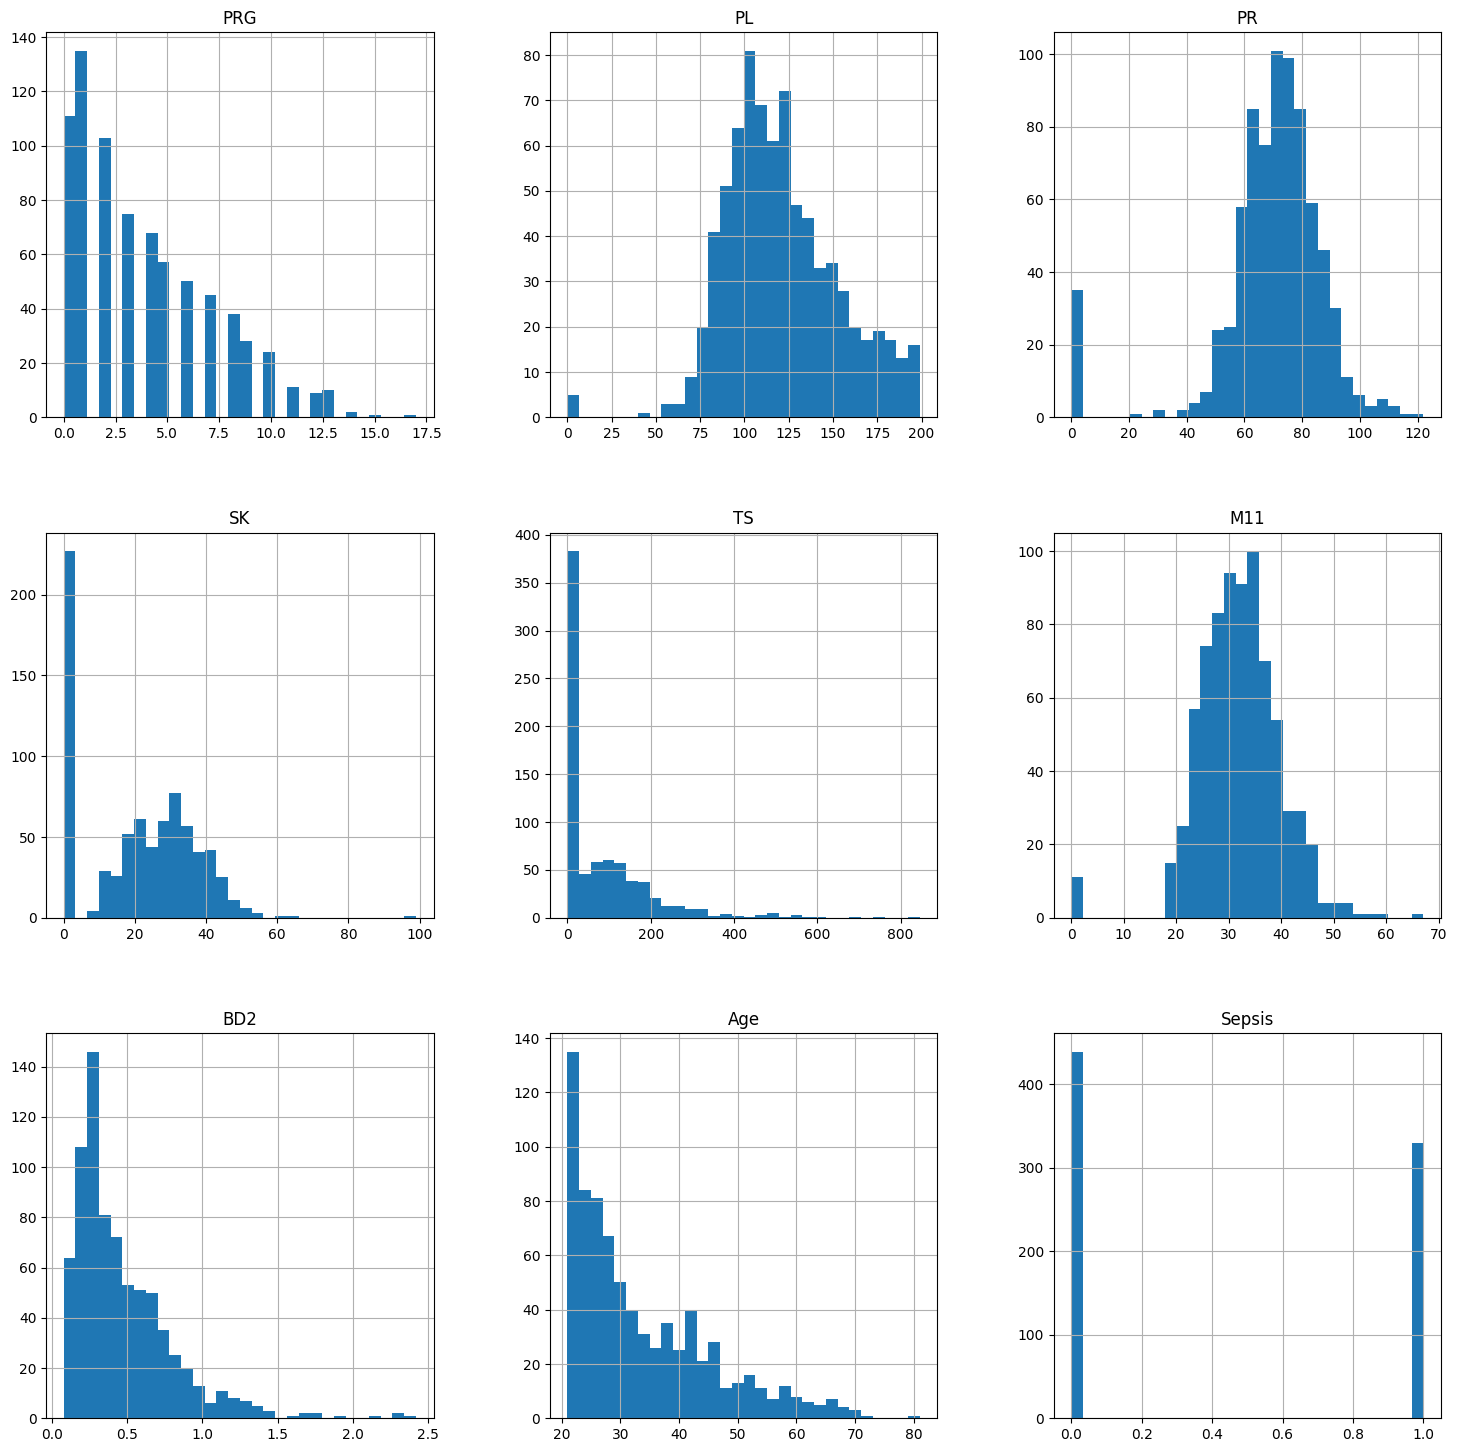

In [21]:
#3. Visualising data  distribution in detail
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()


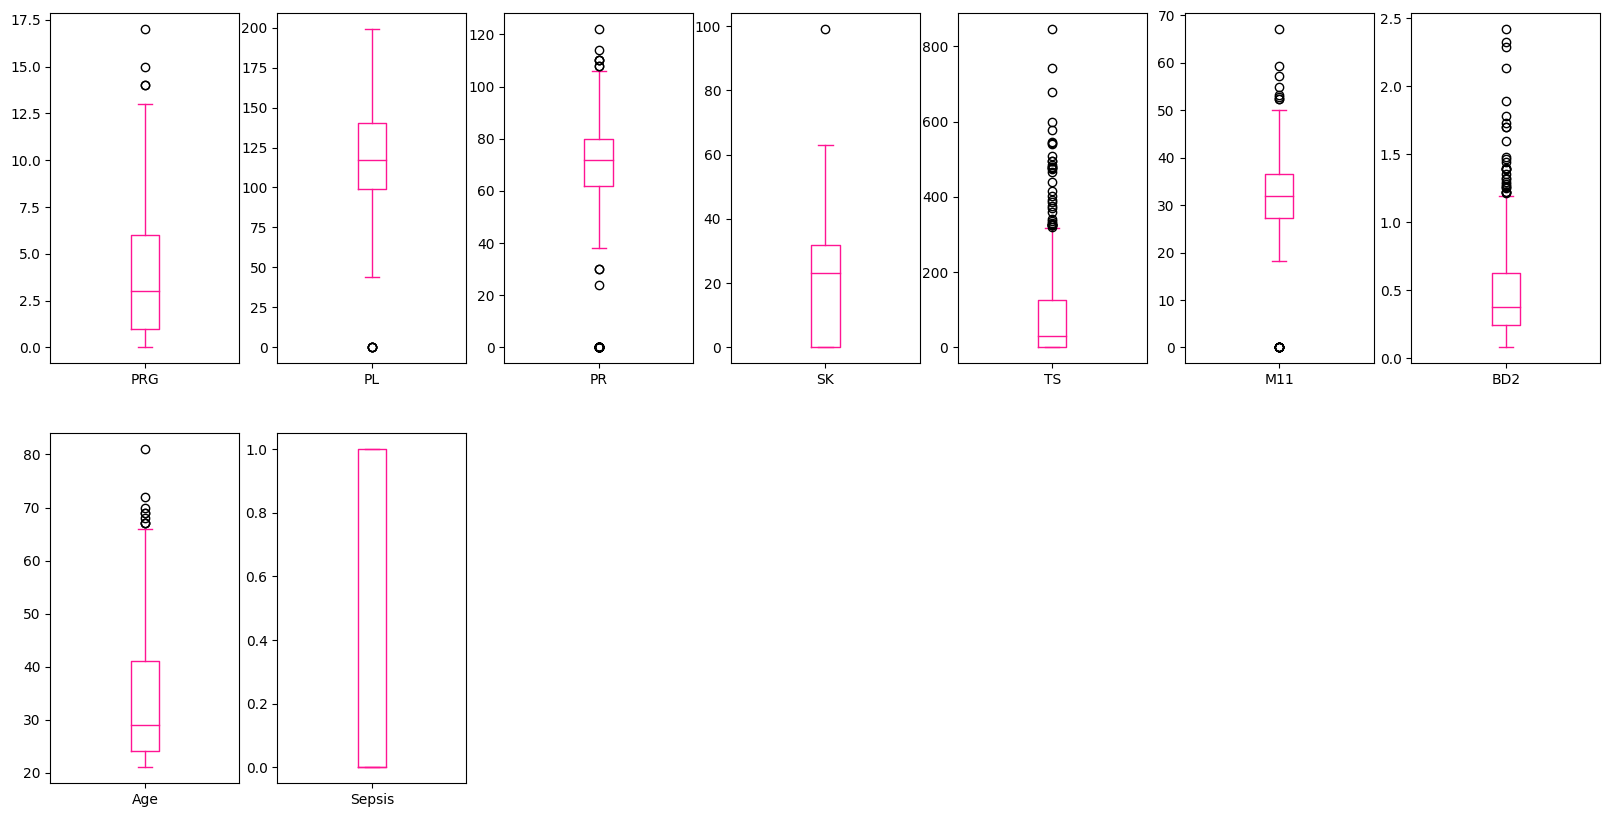

In [22]:
#detecting outliers
df.plot(kind='box', subplots=True, 
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');


In [23]:
#identify the outliers
# define continuous variable & plot
continous_features = ['PRG', 'PL', 'PR', 'TS', 'M11', 'BD2', 'Age']  


In [24]:
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])


For the feature PRG, No of Outliers is 4
For the feature PL, No of Outliers is 5
For the feature PR, No of Outliers is 45
For the feature TS, No of Outliers is 34
For the feature M11, No of Outliers is 19
For the feature BD2, No of Outliers is 29
For the feature Age, No of Outliers is 9


In [25]:
#drop the outliers
outliers(df[continous_features], drop = True)


Outliers from PRG feature removed
Outliers from PL feature removed
Outliers from PR feature removed
Outliers from TS feature removed
Outliers from M11 feature removed
Outliers from BD2 feature removed
Outliers from Age feature removed


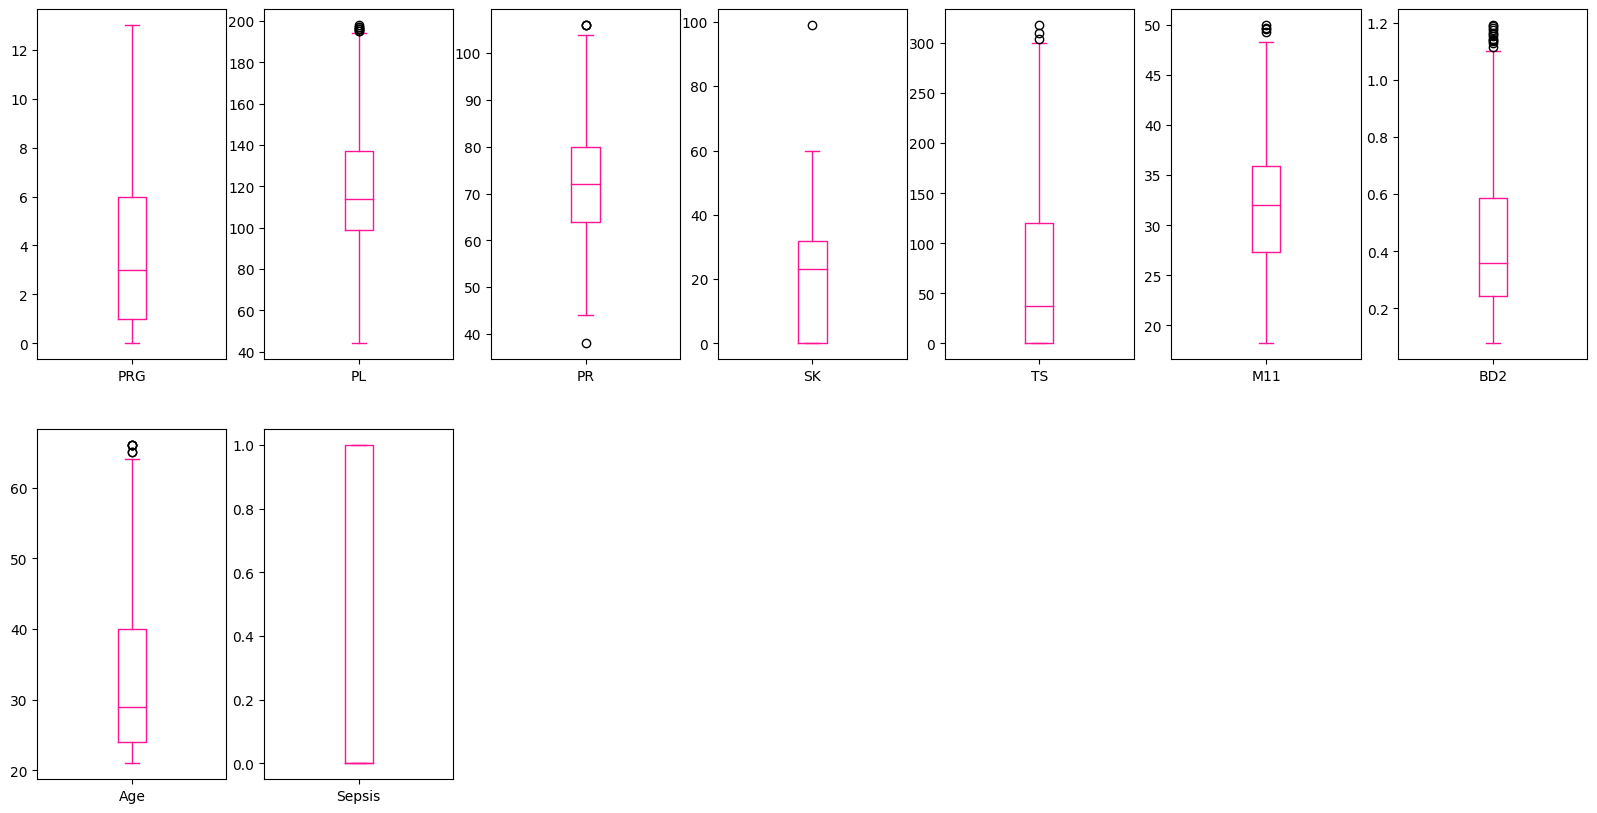

In [26]:
#check if outliers got removed
df.plot(kind='box', subplots=True, 
        layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink');


In [27]:
#Check data shape after outlier removal
df.shape


(640, 9)

0.0    383
1.0    257
Name: Sepsis, dtype: int64


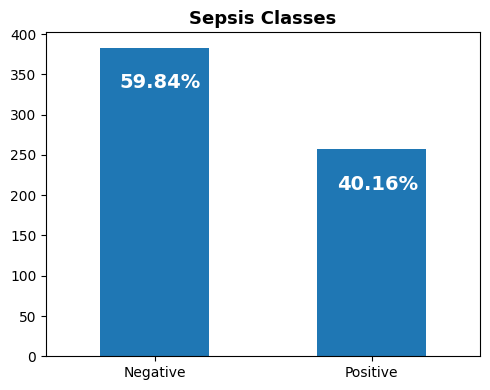

In [28]:
#checking target value distribution
print(df.Sepsis.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Negative", "Positive"]
ax = df.Sepsis.value_counts().plot(kind='bar')
ax.set_title("Sepsis Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()



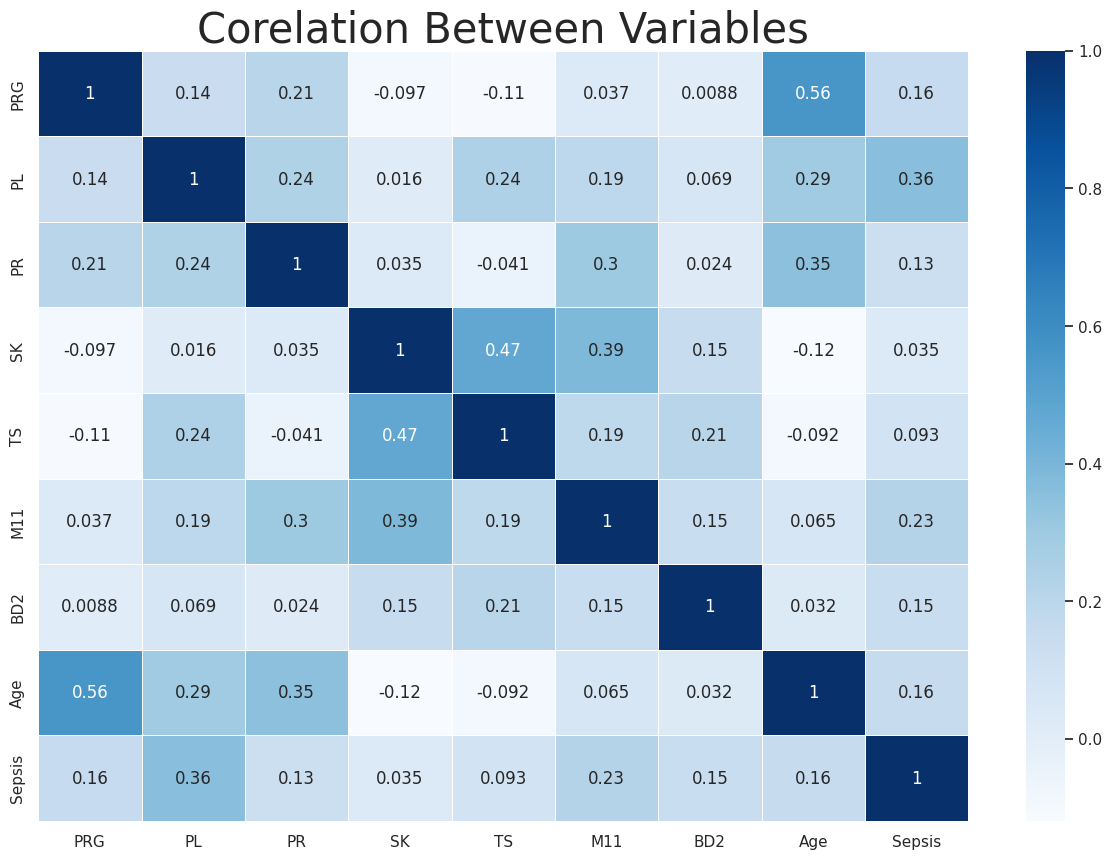

In [29]:
#check correlation between variables
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()


In [30]:

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [31]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Sepsis Disease EDA",
                        html={'style':{'full_width':True}})
profile.to_notebook_iframe()



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
#pre-processing
from sklearn.exceptions import DataDimensionalityWarning
#encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in df:
  if df[col].dtype =='object':
    df[col]=OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
df



PRG   PL  PR  SK   TS   M11    BD2  Age  Sepsis
0      6  148  72  35    0  33.6  0.627   50     1.0
1      1   85  66  29    0  26.6  0.351   31     0.0
2      8  183  64   0    0  23.3  0.672   32     1.0
3      1   89  66  23   94  28.1  0.167   21     0.0
5      5  116  74   0    0  25.6  0.201   30     0.0
..   ...  ...  ..  ..  ...   ...    ...  ...     ...
763   10  101  76  48  180  32.9  0.171   63     1.0
764    2  122  70  27    0  36.8  0.340   27     1.0
765    5  121  72  23  112  26.2  0.245   30     1.0
766    1  126  60   0    0  30.1  0.349   47     1.0
767    1   93  70  31    0  30.4  0.315   23     1.0

[640 rows x 9 columns]

In [33]:
# Removed target variable from the dataframe
class_label =df['Sepsis']
df = df.drop(['Sepsis'], axis =1)
df = (df-df.min())/(df.max()-df.min())
df['Sepsis']=class_label
df


PRG        PL        PR        SK        TS       M11       BD2  \
0    0.461538  0.675325  0.500000  0.353535  0.000000  0.484277  0.493261   
1    0.076923  0.266234  0.411765  0.292929  0.000000  0.264151  0.245283   
2    0.615385  0.902597  0.382353  0.000000  0.000000  0.160377  0.533693   
3    0.076923  0.292208  0.411765  0.232323  0.295597  0.311321  0.079964   
5    0.384615  0.467532  0.529412  0.000000  0.000000  0.232704  0.110512   
..        ...       ...       ...       ...       ...       ...       ...   
763  0.769231  0.370130  0.558824  0.484848  0.566038  0.462264  0.083558   
764  0.153846  0.506494  0.470588  0.272727  0.000000  0.584906  0.235400   
765  0.384615  0.500000  0.500000  0.232323  0.352201  0.251572  0.150045   
766  0.076923  0.532468  0.323529  0.000000  0.000000  0.374214  0.243486   
767  0.076923  0.318182  0.470588  0.313131  0.000000  0.383648  0.212938   

          Age  Sepsis  
0    0.644444     1.0  
1    0.222222     0.0  
2    0.244444     1.0  
3    0.000000     0.0  
5    0.200000     0.0  
..        ...     ...  
763  0.933333     1.0  
764  0.133333     1.0  
765  0.200000     1.0  
766  0.577778     1.0  
767  0.044444     1.0  

[640 rows x 9 columns]

In [34]:
#pre-processing
sepsis_data = df.copy()
le = preprocessing.LabelEncoder()

PRG = le.fit_transform(list(sepsis_data["PRG"])) # Plasma glucose
PL = le.fit_transform(list(sepsis_data["PL"])) # Blood Work Result-1 (mu U/ml)
PR = le.fit_transform(list(sepsis_data["PR"])) # Blood Pressure (mm Hg)
SK = le.fit_transform(list(sepsis_data["SK"])) # Blood Work Result-2 (mm)
TS = le.fit_transform(list(sepsis_data["TS"])) # Blood Work Result-3 (mu U/ml)
M11 = le.fit_transform(list(sepsis_data["M11"])) # Body mass index (weight in kg/(height in m)^2
BD2 = le.fit_transform(list(sepsis_data["BD2"])) # Blood Work Result-4 (mu U/ml)
Age = le.fit_transform(list(sepsis_data["Age"])) # Patients Age

Sepsis = le.fit_transform(list(sepsis_data["Sepsis"])) # Sepsis 0-not present 1-present



In [35]:
x = list(zip(PRG, PL, PR, SK, TS, M11, BD2, Age))
y = list(Sepsis)
# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'


In [36]:
# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and vise versa for Y(features)
# The test data will test the accuracy of the model created
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows


In [37]:
#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)


((512, 8), (128, 8))

In [38]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))



# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)


Performance on Training set
NB: 0.669808 (0.028509)

SVM: 0.673805 (0.050918)

GBM: 0.636836 (0.055342)

RF: 0.685456 (0.039907)



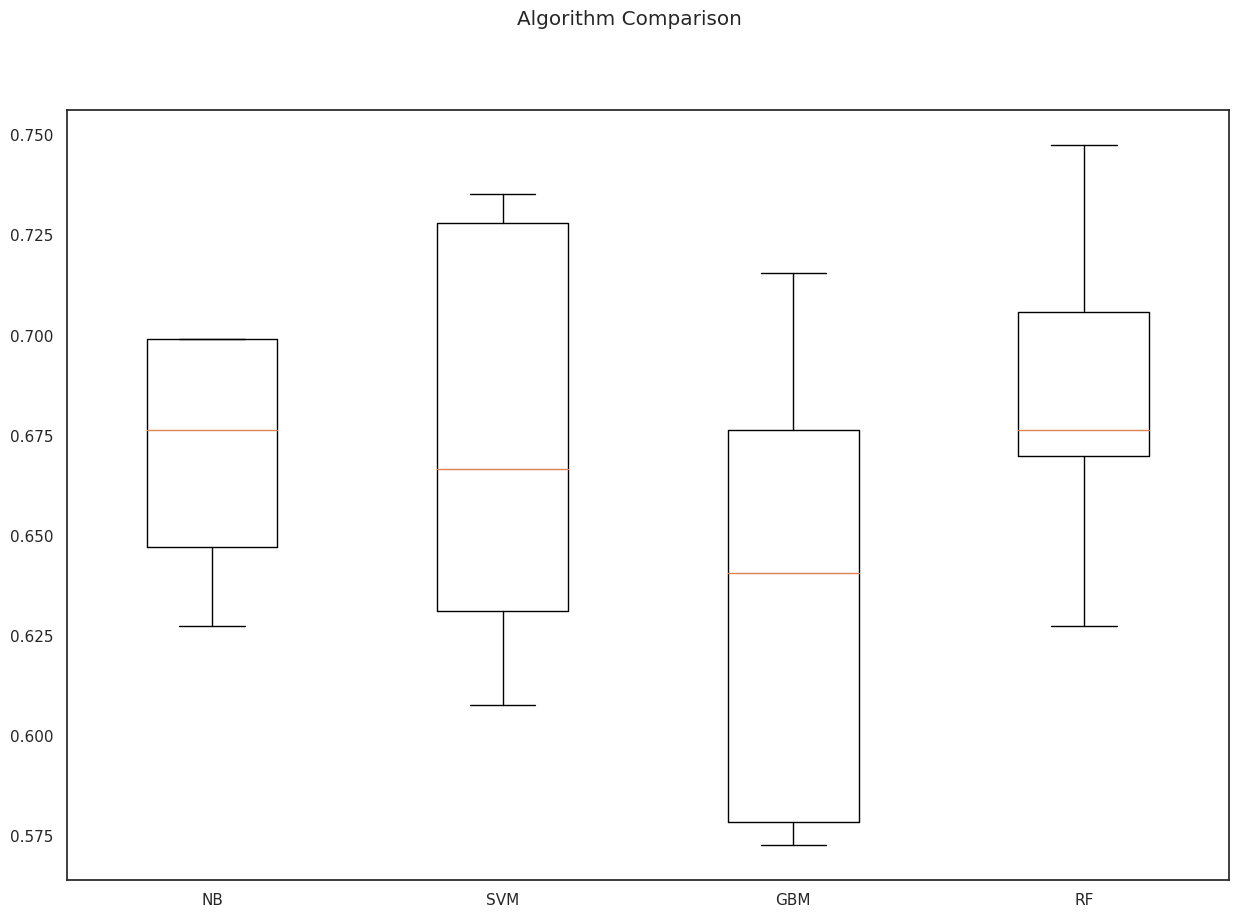

In [39]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [42]:

#Model Evaluation by testing with independent/external test data set. 
# Make predictions on validation/test dataset

models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

best_model = rf
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))


Best Model Accuracy Score on Test Set: 0.671875


In [59]:
#Model Performance Evaluation Metric 1 - Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.79      0.74        81
           1       0.53      0.40      0.46        47

    accuracy                           0.65       128
   macro avg       0.61      0.60      0.60       128
weighted avg       0.63      0.65      0.64       128



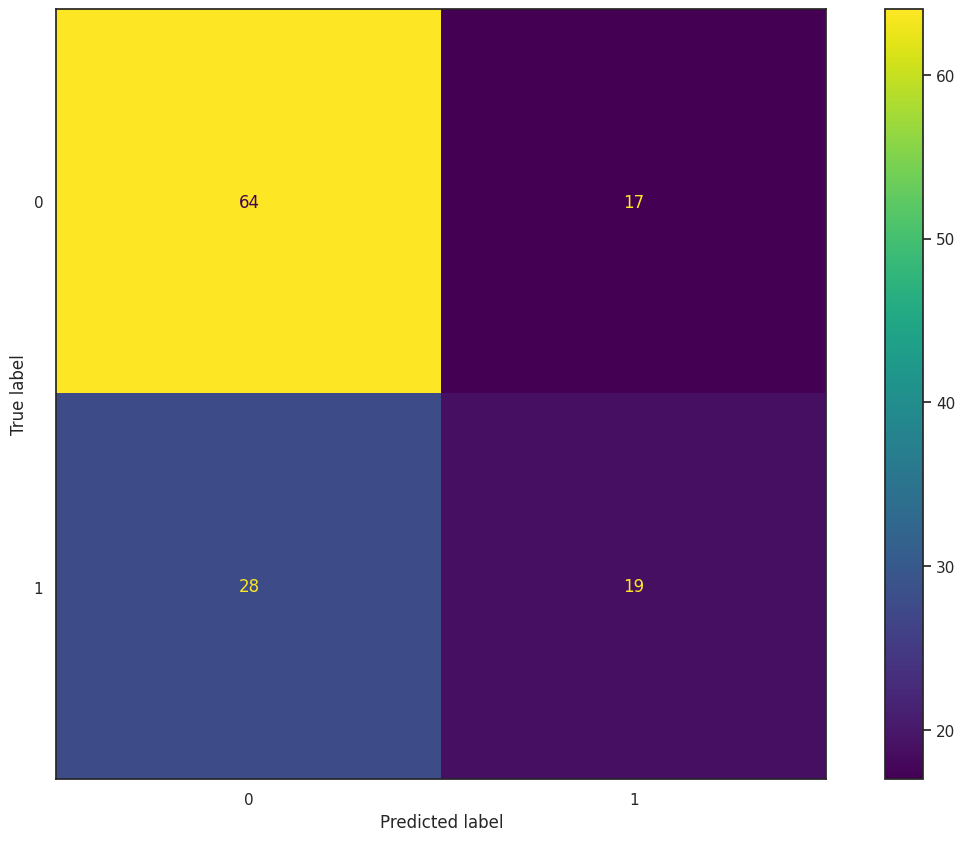

In [60]:
#Model Performance Evaluation Metric 2
#Confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


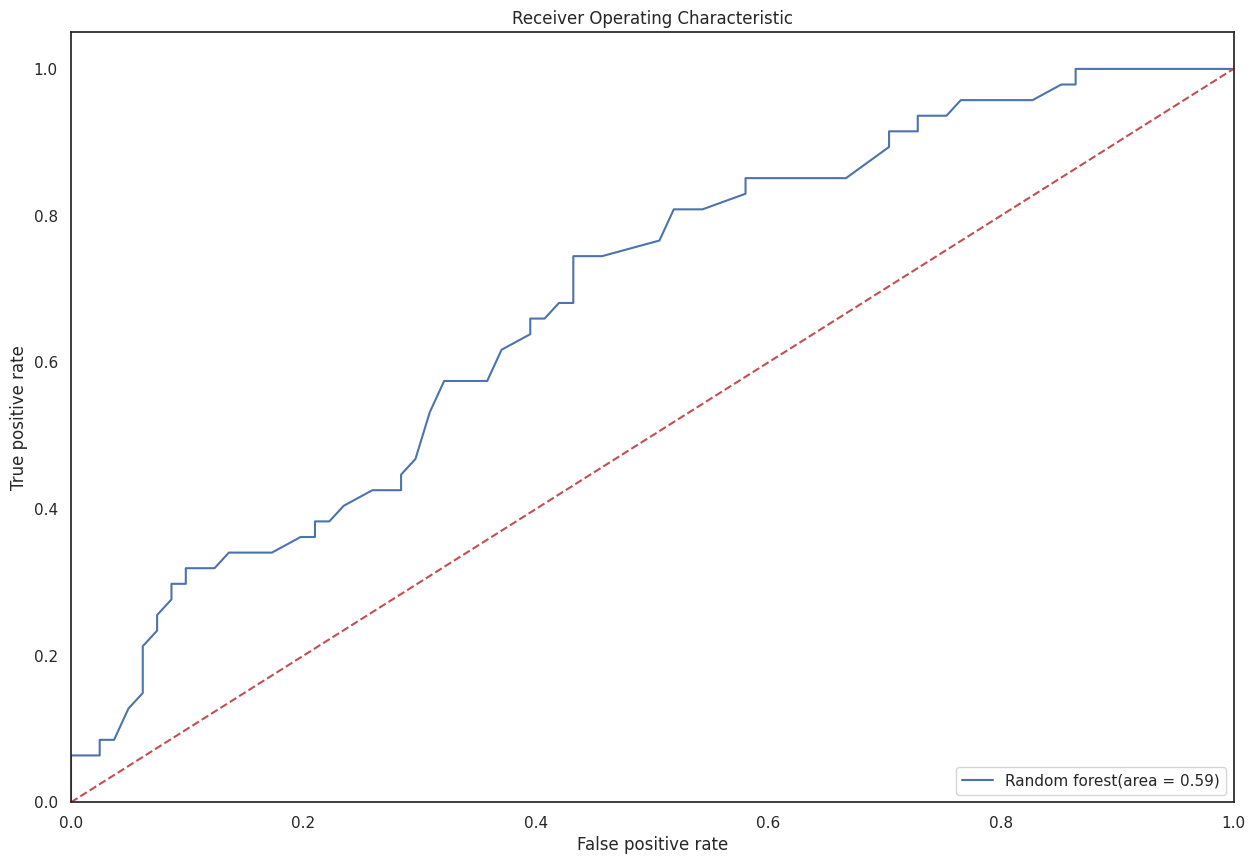

In [43]:
#Model Evaluation Metric 3- ROC-AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

best_model = rf
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label = 'Random forest(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()


In [44]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)


Predicted:  0 Actual:  0 Data:  (2, 33, 16, 6, 19, 13, 328, 5)
Predicted:  0 Actual:  0 Data:  (1, 17, 19, 4, 29, 91, 277, 1)
Predicted:  1 Actual:  1 Data:  (6, 127, 22, 0, 0, 30, 18, 38)
Predicted:  0 Actual:  0 Data:  (9, 60, 17, 37, 58, 116, 191, 19)
Predicted:  0 Actual:  1 Data:  (7, 51, 13, 0, 0, 67, 363, 13)
Predicted:  0 Actual:  1 Data:  (6, 71, 17, 16, 78, 138, 285, 8)
Predicted:  0 Actual:  0 Data:  (1, 81, 24, 33, 0, 188, 315, 7)
Predicted:  0 Actual:  0 Data:  (3, 36, 12, 12, 41, 15, 129, 5)
Predicted:  1 Actual:  1 Data:  (4, 93, 20, 0, 0, 222, 97, 11)
Predicted:  0 Actual:  0 Data:  (3, 11, 16, 21, 16, 88, 139, 2)
Predicted:  1 Actual:  0 Data:  (5, 84, 20, 0, 0, 90, 231, 7)
Predicted:  0 Actual:  0 Data:  (0, 71, 9, 13, 142, 57, 179, 0)
Predicted:  1 Actual:  0 Data:  (0, 38, 21, 0, 0, 141, 70, 5)
Predicted:  1 Actual:  0 Data:  (4, 59, 16, 0, 0, 134, 204, 8)
Predicted:  0 Actual:  0 Data:  (6, 17, 15, 23, 0, 55, 151, 20)
Predicted:  1 Actual:  1 Data:  (5, 46, 12, 34,